In [28]:
import numpy as np
%cd ..
from src import graph_building


/


In [29]:
data = np.array([[3,-1],
                 [4,0],
                 [5,-2],
                 [4,6],
                 [5,7],
                 [5.5,6]])

In [45]:
dist = graph_building.distances(data)
# dist

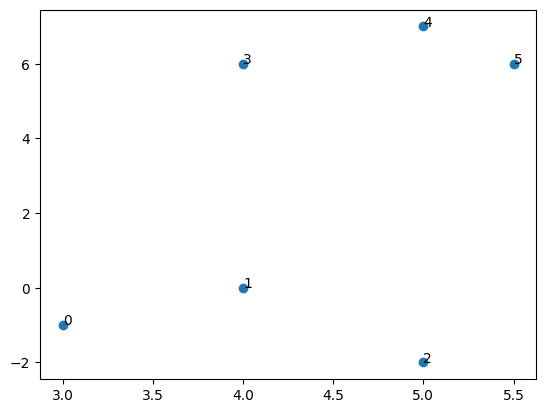

In [38]:
import matplotlib.pyplot as plt

# draw datapoints
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
for i in range(data.shape[0]):
    ax.annotate(i, (data[i, 0], data[i, 1]))

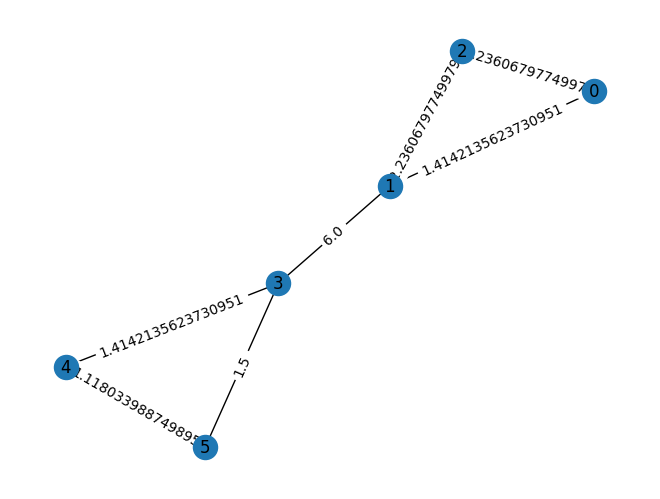

In [46]:
import networkx as nx

graph = graph_building.build_graph(dist)

layout = nx.spring_layout(graph)

nx.draw(graph, pos=layout, with_labels=True)
labels= nx.get_edge_attributes(graph, 'weight')
_ = nx.draw_networkx_edge_labels(graph, pos=layout, edge_labels=labels)